In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [14]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [21]:
cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
df_x = pd.DataFrame(data = cancer_dataset.data, columns = cancer_dataset.feature_names)
print(df_x.shape)
df_x.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [40]:
df_y = pd.DataFrame(data = cancer_dataset.target, columns = ['Output'])
print(df_y.shape)
df_y.head()

(569, 1)


,Output
0,0
1,0
2,0
3,0
4,0


In [51]:
df = pd.concat([df_x, df_y], axis = 1)
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [134]:
from sklearn.decomposition import PCA
pca_features = PCA()

In [135]:
df_x_pca = pd.DataFrame(data = pca_features.fit_transform(df_x), columns = df_x.columns)
print(df_x_pca.shape)
df_x_pca.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,...,0.021189,0.000241,0.002528,0.011560,0.005773,0.001377,-0.001982,0.001293,0.001989,0.000704
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,...,0.005237,0.021069,0.001565,0.006968,-0.006978,0.001411,-0.000083,-0.001347,0.000686,-0.001061
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,...,-0.009865,-0.002394,-0.004125,-0.004007,0.000709,-0.003781,0.000178,0.000018,-0.000775,0.000405
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,...,0.011169,0.007063,0.001537,0.007003,-0.010261,-0.002899,0.000016,0.001369,-0.002139,-0.001657
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,...,-0.009916,0.010269,0.002204,0.002764,0.002455,0.001665,0.003290,0.000273,0.001783,0.000327


In [50]:
df_y_pca = pd.DataFrame(data = pca_features.fit_transform(df_y), columns = df_y.columns)
print(df_y_pca.shape)
df_y_pca.head()

(569, 1)


,Output
0,0.627417
1,0.627417
2,0.627417
3,0.627417
4,0.627417


In [52]:
df_pca = pd.concat([df_x_pca, df_y_pca], axis = 1)
print(df_pca.shape)
df_pca.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,...,0.000241,0.002528,0.011560,0.005773,0.001377,-0.001982,0.001293,0.001989,0.000704,0.627417
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,...,0.021069,0.001565,0.006968,-0.006978,0.001411,-0.000083,-0.001347,0.000686,-0.001061,0.627417
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,...,-0.002394,-0.004125,-0.004007,0.000709,-0.003781,0.000178,0.000018,-0.000775,0.000405,0.627417
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,...,0.007063,0.001537,0.007003,-0.010261,-0.002899,0.000016,0.001369,-0.002139,-0.001657,0.627417
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,...,0.010269,0.002204,0.002764,0.002455,0.001665,0.003290,0.000273,0.001783,0.000327,0.627417


In [60]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver = 'lbfgs')
logit_pcs = LogisticRegression(solver = 'lbfgs')

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_x_pca, df_y)

In [80]:
logit.fit(x_train, y_train.values[:,0])
logit_pcs.fit(x_train_pca, y_train_pca.values[:,0])
y_pred = logit.predict(x_test)
y_pred_pca = logit_pcs.predict(x_test_pca)

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test_pca, y_pred_pca))

0.9300699300699301
0.951048951048951


In [82]:
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test_pca, y_pred_pca))

[[41  7]
 [ 3 92]]
[[56  4]
 [ 3 80]]


In [83]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        48
           1       0.93      0.97      0.95        95

    accuracy                           0.93       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.95      0.96      0.96        83

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [85]:
print(roc_auc_score(y_test, y_pred))
print(roc_auc_score(y_test_pca, y_pred_pca))

0.9112938596491228
0.9485943775100402


In [108]:
y_pred_prob = logit.predict_proba(x_test)
y_pred_prob_pca = logit_pcs.predict_proba(x_test_pca)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
fpr_pca, tpr_pca, threshold_pca = roc_curve(y_test_pca, y_pred_pca)

In [114]:
print(fpr, tpr, threshold)
print(fpr_pca, tpr_pca, threshold_pca)

[0.         0.14583333 1.        ] [0.         0.96842105 1.        ] [2 1 0]
[0.         0.06666667 1.        ] [0.         0.96385542 1.        ] [2 1 0]


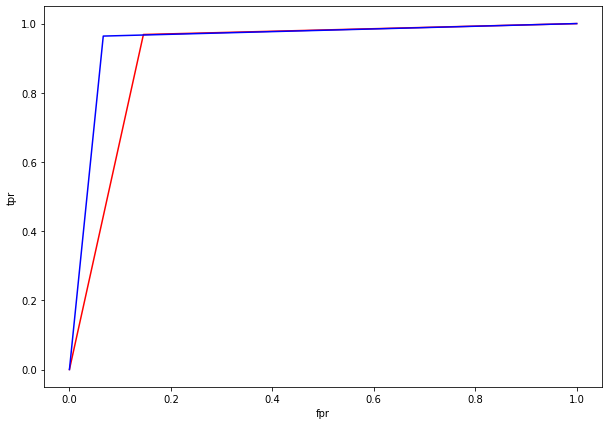

In [112]:
plt.figure(figsize = (10,7))
plt.plot(fpr, tpr, color = 'red')
plt.plot(fpr_pca, tpr_pca, color = 'blue')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

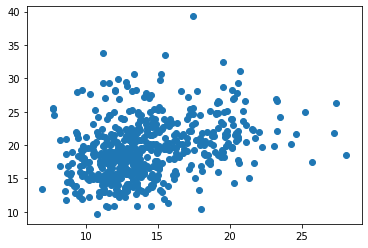

In [131]:
plt.scatter(df_x.iloc[:,0], df_x.iloc[:,1])
plt.show()

In [139]:
pca_features.components_

array([ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,  5.16826469e-01,
        4.23694535e-06,  4.05260047e-05,  8.19399539e-05,  4.77807775e-05,
        7.07804332e-06, -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
        2.23634150e-03,  5.57271669e-02, -8.05646029e-07,  5.51918197e-06,
        8.87094462e-06,  3.27915009e-06, -1.24101836e-06, -8.54530832e-08,
        7.15473257e-03,  3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
        6.42005481e-06,  1.01275937e-04,  1.68928625e-04,  7.36658178e-05,
        1.78986262e-05,  1.61356159e-06])

In [138]:
df_x_pca.shape

(569, 30)